In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-02-14 17:01:34--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.207, 173.194.74.207, 173.194.192.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   133MB/s    in 0.5s    

2024-02-14 17:01:34 (133 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

In [ ]:
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')

validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

In [ ]:
print("Train cats :",len(os.listdir(train_cats)))
print("Train dogs :",len(os.listdir(train_dogs)))
print("Test cats :",len(os.listdir(validation_cats)))
print("Test dogs :",len(os.listdir(validation_dogs)))

Train cats : 1000
Train dogs : 1000
Test cats : 500
Test dogs : 500


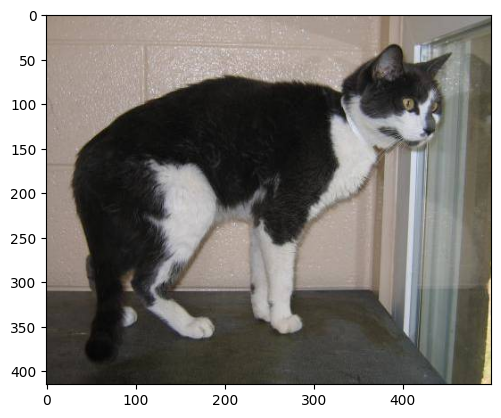

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

cat_img = load_img(os.path.join(validation_cats, os.listdir(validation_cats)[0]))
plt.imshow(cat_img)
plt.show()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size = (3, 3),
                        activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512,  activation = 'relu'),

    keras.layers.Dense(units = 1, activation = 'sigmoid')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255)
validation_generator = ImageDataGenerator(rescale = 1/255)

train_data = train_generator.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

validation_data = train_generator.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch = 100,
    epochs = 5,
    validation_data = validation_data,
    verbose = 2
)

Epoch 1/5
100/100 - 63s - loss: 0.4406 - accuracy: 0.7850 - val_loss: 0.5544 - val_accuracy: 0.7120 - 63s/epoch - 634ms/step
Epoch 2/5
100/100 - 66s - loss: 0.3803 - accuracy: 0.8315 - val_loss: 0.5703 - val_accuracy: 0.7210 - 66s/epoch - 659ms/step
Epoch 3/5
100/100 - 64s - loss: 0.3147 - accuracy: 0.8605 - val_loss: 0.5874 - val_accuracy: 0.7180 - 64s/epoch - 641ms/step
Epoch 4/5
100/100 - 63s - loss: 0.2408 - accuracy: 0.9015 - val_loss: 0.6815 - val_accuracy: 0.7320 - 63s/epoch - 629ms/step
Epoch 5/5
100/100 - 61s - loss: 0.1800 - accuracy: 0.9325 - val_loss: 0.7223 - val_accuracy: 0.7290 - 61s/epoch - 610ms/step


In [ ]:
train_data

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded_file = files.upload()

for i in uploaded_file.keys():
    print(uploaded_file.keys())

    path = '/content/' + i

    img = image.load_img(path, target_size = (150, 150))

    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size = 10)

    print(classes[0])

    if classes[0]>0.5:
        print(i + " is a dog")

    else:
        print(i + " is a cat")

print(uploaded_file.keys())

Saving photo-1552053831-71594a27632d.jpeg to photo-1552053831-71594a27632d.jpeg
dict_keys(['photo-1552053831-71594a27632d.jpeg'])
1/1 [==============================] - 0s 31ms/step
[0.97769874]
photo-1552053831-71594a27632d.jpeg is a dog
dict_keys(['photo-1552053831-71594a27632d.jpeg'])
